In [18]:
%matplotlib inline

import networkx as nx
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [19]:
# import csv file as a df
df = pd.read_csv("getTransactionData.csv")
df.head(25)

,Unnamed: 0,timestamp_x,compare_timestamp,transaction_hash,value_in_eth,from_address,to_address,timestamp_y,close
0,0,1620742426,2021-05-11 10:14:00,0x962cd8fe9ecb99ba9497ad956dffb0d5bed88c7324f6...,1.102434,0x00f2ef06346dbf1b606d2bfdc571c42ac3f785e3,0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be,1620742440,3968.89
1,1,1620742407,2021-05-11 10:13:00,0x86d37817f3ddbd603819d7677f3b702b5e78d39d2704...,1.147000,0x69132a961a1e84a65341e3bcd0709c6fd06072f6,0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be,1620742380,3968.36
2,2,1620742318,2021-05-11 10:12:00,0xa8df9e27c4aea9ddd4ac61528c6967ce09b6df540367...,0.950438,0x6b0c4d090e9b82176a9fefc363afeb2865416343,0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be,1620742320,3970.32
3,3,1620742318,2021-05-11 10:12:00,0xff0dd7a72b89cd928213d53ea1ec806af1d6df6ed38e...,4.979669,0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be,0xdcf03fd48f06baadb65b3635b0b00e96ed6969ea,1620742320,3970.32
4,4,1620742318,2021-05-11 10:12:00,0xd1bcdf5328ccae0b5af37ca9bf0ef3fa5ff004240e44...,1.179434,0x5183305dd6a3d45ea69a8212e0ff85c5539dd9b8,0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be,1620742320,3970.32
5,5,1620742318,2021-05-11 10:12:00,0x19cef1df5442ff48fecff099092eb24c02e9d7e5b00a...,0.974498,0x4862f574d41b9a7f52aefdd9cc9305fb8e8848ae,0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be,1620742320,3970.32
6,6,1620742318,2021-05-11 10:12:00,0x42a66a411fdbb1af51ad5593f0efa118f9f899f36309...,1.117000,0xdf213c77a9ea28103ee8448511ab015baa2af573,0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be,1620742320,3970.32
7,7,1620742318,2021-05-11 10:12:00,0x8956602bb410a59fced6021660920e242c5f4f18f29f...,0.951546,0xe6b7e3d9520b7cc2f13d8d6883770067986f4553,0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be,1620742320,3970.32
8,8,1620742265,2021-05-11 10:11:00,0xb9973dc616803a8d3d1d69ceef5f89c06728be8ca5ce...,1.596018,0xa8d4334a33a7400de84ffd24598f23ba1f40df4a,0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be,1620742260,3964.86
9,9,1620742243,2021-05-11 10:11:00,0x342708ca57a96288be7bfac09ba662e83861dd0627b0...,1.736501,0xec36f4ad83afb4c43e1b8b6738907873281c539d,0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be,1620742260,3964.86


In [20]:
timestamp = df['compare_timestamp'].to_numpy()
valueETH = df['value_in_eth'].to_numpy()
priceETH = df['close'].to_numpy()

conv_ts = []
for time in timestamp:
    conv_ts.append(float(time.split()[1].replace(':',''))/100)

AttributeError: 'str' object has no attribute 'time'

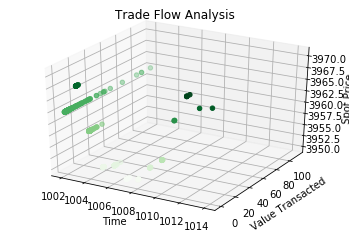

In [21]:
ax = plt.axes(projection='3d')

ax.scatter3D(conv_ts, valueETH, priceETH, zdir='z', c=priceETH, cmap='Greens');
ax.set_title('Trade Flow Analysis')
ax.set_xlabel('Time')
ax.set_ylabel('Value Transacted')
ax.set_zlabel('Spot Price')

stamp = int(time.time())

plt.savefig(f'trade_flow_analysis_{stamp}.png')
plt.show()